# **TELCO CUSTOMER CHURN PREDICTION**

THIS NOTEBOOK PERFORMS:
- DATASET EXPLORATION
- FEATURE ENGINEERING
- DATA CLEANING
- PCA, SHAP VISUALIZATIONS

In [52]:
# Importing the Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [53]:
import os
# Check current directory and change if needed
print("Current directory:", os.getcwd())

# If you're in the notebook directory, change to project root
if 'notebook' in os.getcwd():
    os.chdir('..')
    print("Changed to:", os.getcwd())

# Verify the data file exists
data_path = 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
print(f"Data file exists: {os.path.exists(data_path)}")

Current directory: /Users/krishnasathvikaganni/PROJECTS/CUSTOMER_CHURN_PREDICTION
Data file exists: True


In [54]:
# Loading the Dataset
df=pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
# Basic Information
df.info()
df.describe()
df['Churn'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

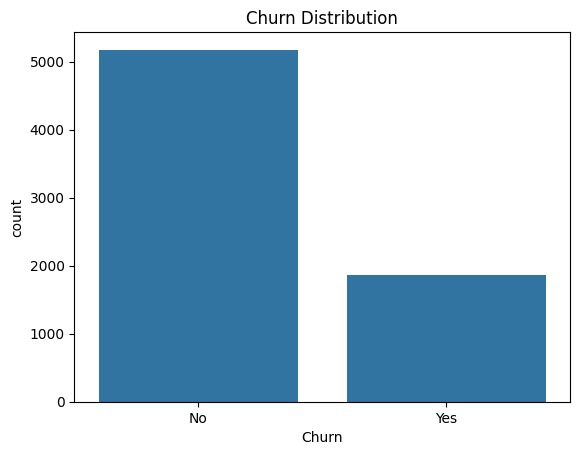

In [56]:
# Visualizing the churn distribution
sns.countplot(x='Churn',data=df)
plt.title("Churn Distribution")

In [57]:
# Loading the cleaned data
from src.data_preprocessing import load_data
df=load_data()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
# Feature Engineering
from src.feature_engineering import encode_and_new
df_encoded=encode_and_new(df)
df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,Churn,ChargesPerMonth,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,14.925000,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,53.985714,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,36.050000,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,40.016304,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,50.550000,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


<Axes: xlabel='Churn', ylabel='count'>

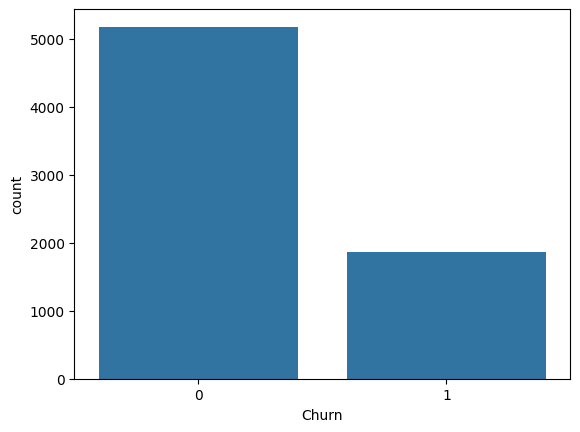

In [59]:
# Churn Distribution ( checking Imbalance )
import seaborn as sns
sns.countplot(x='Churn',data=df_encoded)


In [60]:
# Checking balance
df_encoded['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

<Axes: >

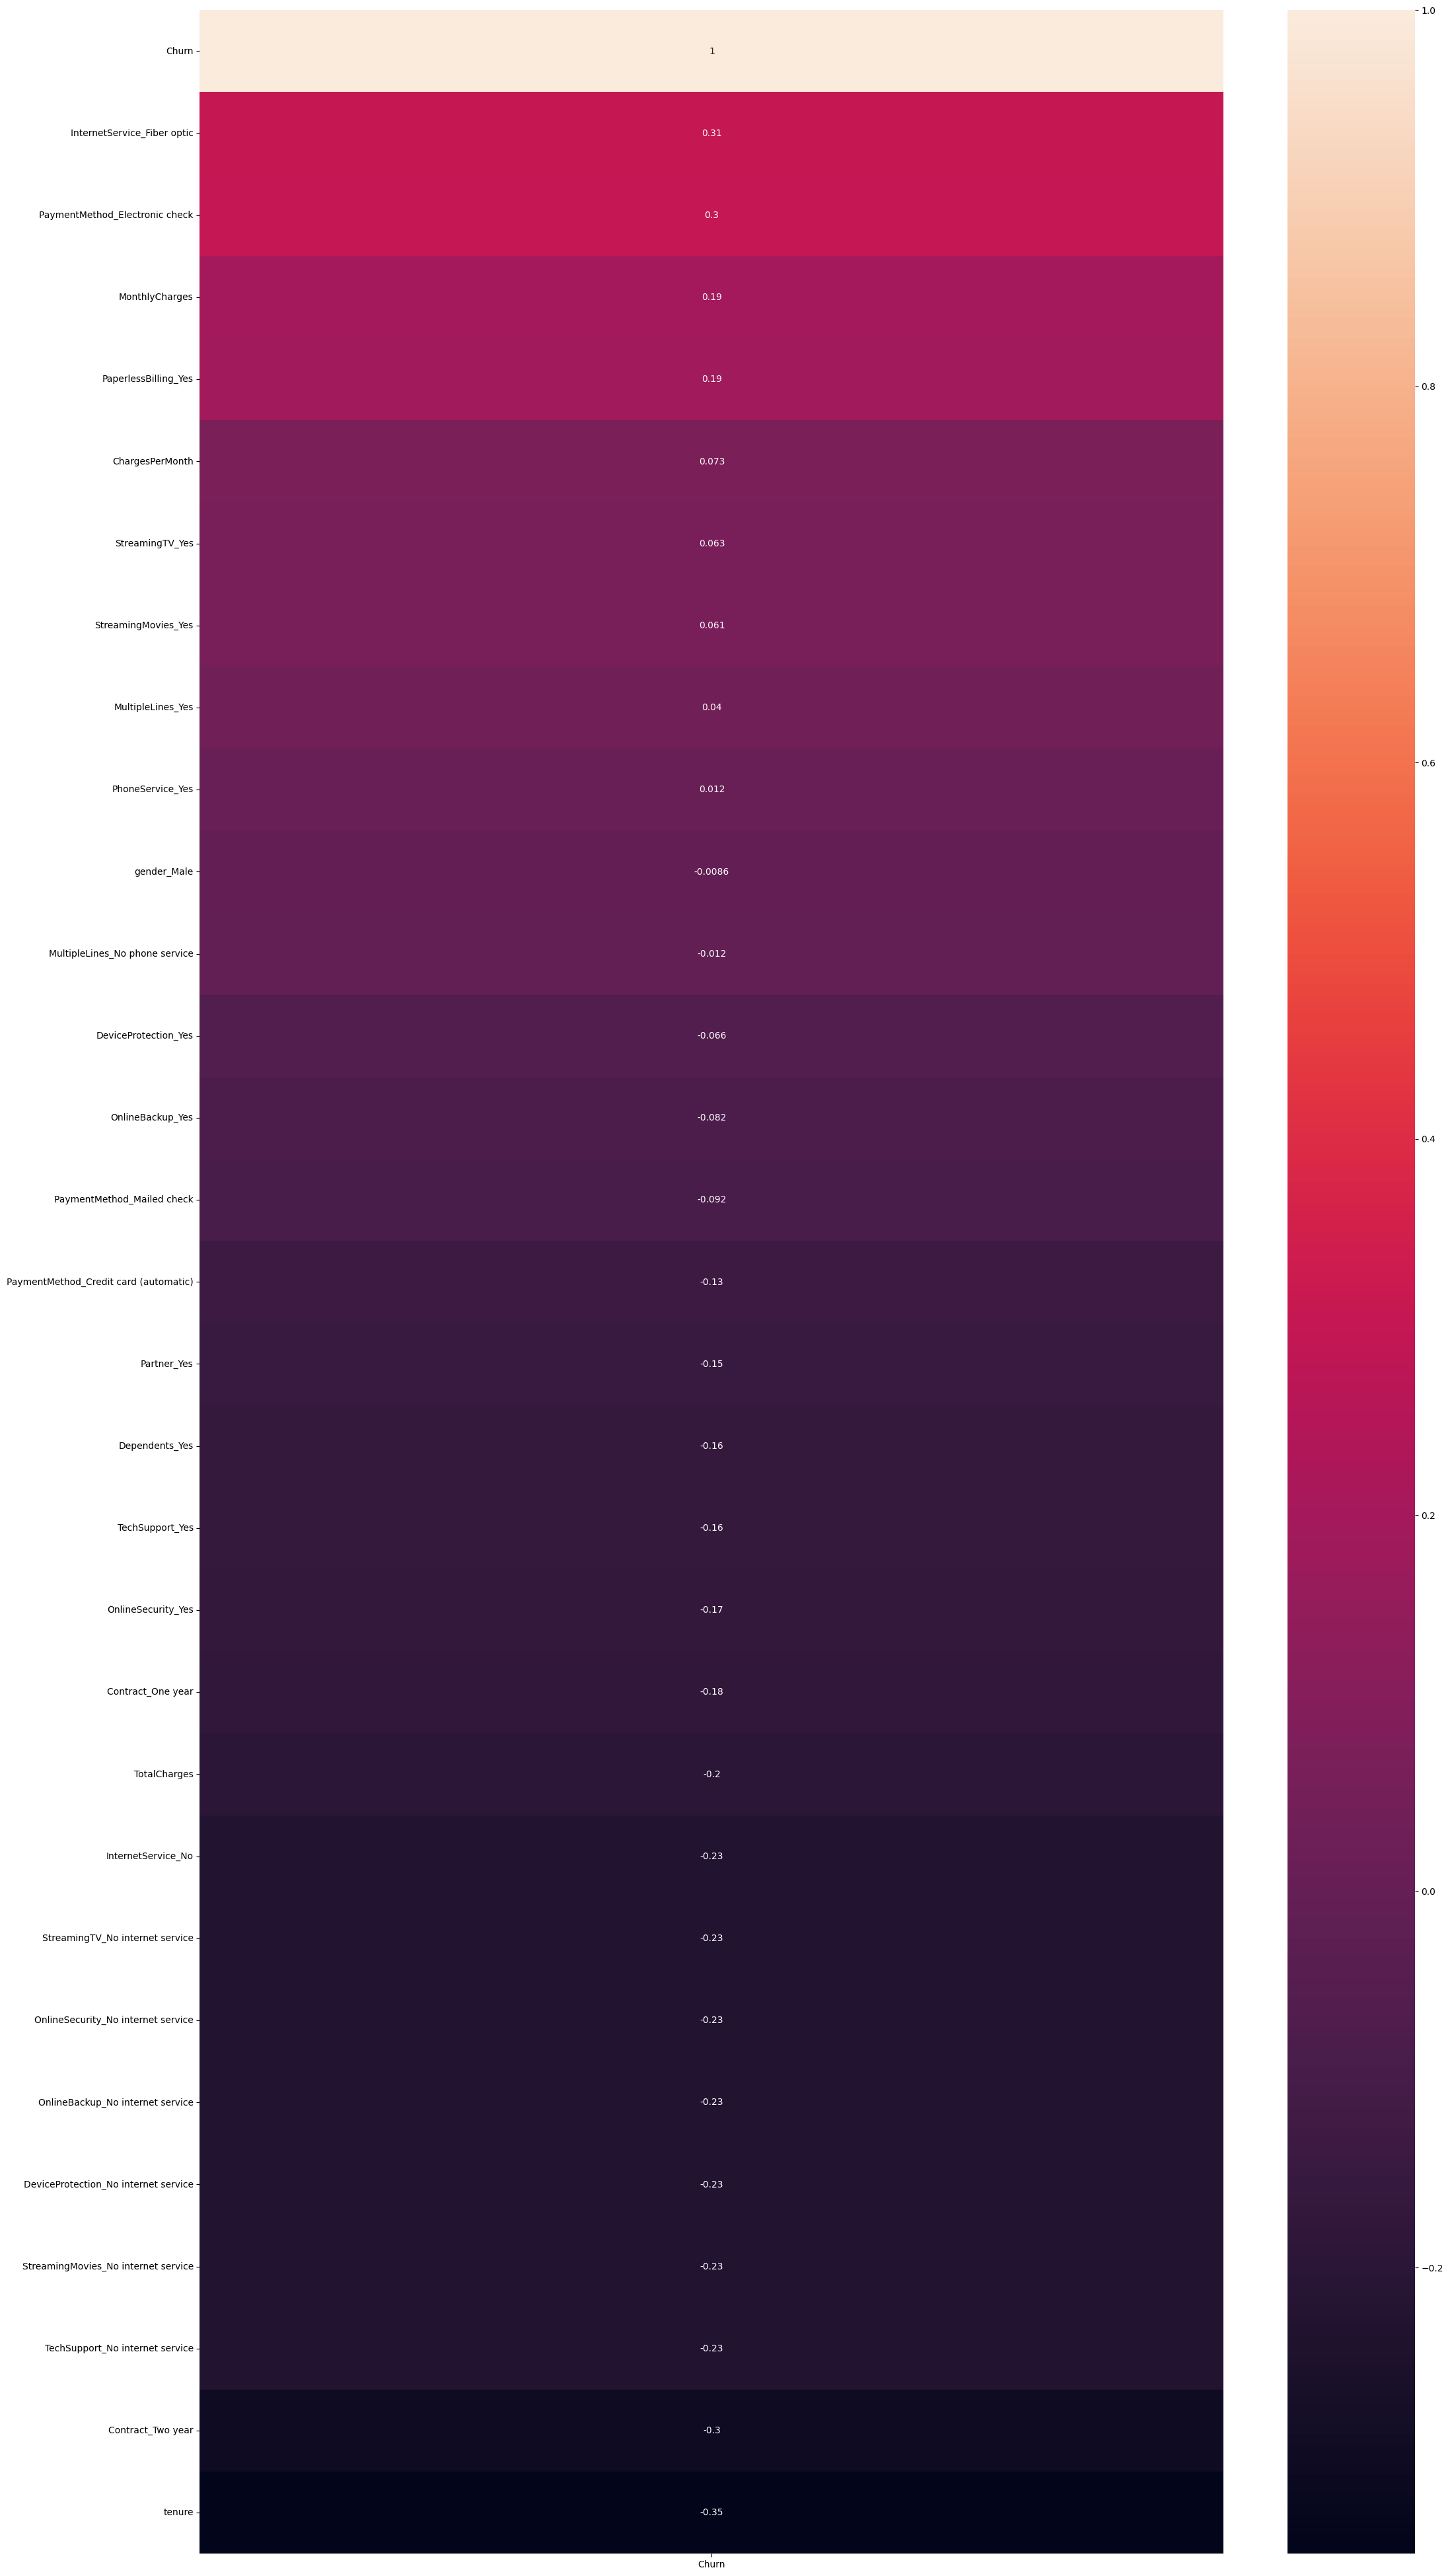

In [64]:
# Checking correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,50))
corr=df_encoded.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn',ascending=False),annot=True)

In [69]:
# Handling class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting Data
X=df_encoded.drop("Churn",axis=1)
y=df_encoded["Churn"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [70]:
# Applying SMOTE
smote=SMOTE(random_state=42)
X_train_res,y_train_res=smote.fit_resample(X_train,y_train)

print("Before Applying SMOTE:",y_train.value_counts())
print("\nAfter Applying SMOTE:",y_train_res.value_counts())

Before Applying SMOTE: Churn
0    4139
1    1495
Name: count, dtype: int64

After Applying SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64


In [71]:
# Training the models and comparing the AUC
from src.model import train_models

results=train_models(X_train_res,y_train_res)
for model_name,metrics in results.items():
    print(f"{model_name}:AUC={metrics['roc_auc_mean']:.4f}")

/Users/krishnasathvikaganni/PROJECTS/CUSTOMER_CHURN_PREDICTION/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/krishnasathvikaganni/PROJECTS/CUSTOMER_CHURN_PREDICTION/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

LogisticRegression:AUC=0.9072
DecisionTree:AUC=0.7881
RandomForest:AUC=0.9294
XGBoost:AUC=0.9293
CatBoost:AUC=0.9324


In [73]:
# Training the best model with tuning
from src.model import tune_and_train_best

best_model,best_params=tune_and_train_best(X_train_res,y_train_res)
print("Best Parameters:",best_params)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [75]:
# Evaluating on test data
from sklearn.metrics import classification_report,roc_auc_score

y_pred=best_model.predict(X_test)
y_prob=best_model.predict_proba(X_test)[:,1]

print("Classification Report:\n",classification_report(y_test,y_pred))
print("ROC-AUC:",roc_auc_score(y_test,y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1035
           1       0.55      0.57      0.56       374

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.76      0.77      1409

ROC-AUC: 0.8140135369035624


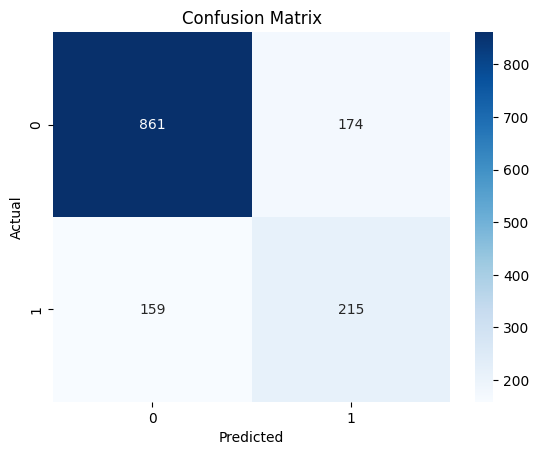

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

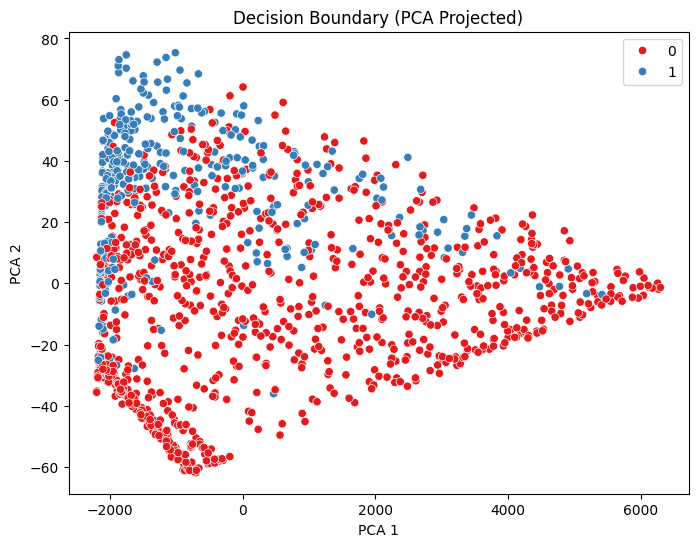

In [80]:
# 2D PCA projection
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_vis=pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:,0],y=X_vis[:,1],hue=y_pred,palette="Set1")
plt.title("Decision Boundary (PCA Projected)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()